In [ ]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Aula 3 - ANÁLISE EXPLORATÓRIA DE DADOS
# Prof. André Filipe de Moraes Batista, PhD.
# 

In [1]:
import pandas as pd 

In [2]:
dados = pd.read_csv('../dados/gapminder_data.csv')

In [3]:
dados

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


Confira sempre o tipo de dado que o Pandas entendeu:

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


# Estatísticas descritivas básicas

In [5]:
dados.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


# Buscando o Brasil

In [6]:
dados.query('        country == "Brazil"    and year == 1977       ')

,country,year,pop,continent,lifeExp,gdpPercap
173,Brazil,1977,114313951.0,Americas,61.489,6660.118654


In [7]:
dados.rename(columns={'lifeExp': 'ExpecVida'}) ### DICA = Como renomear colunas

,country,year,pop,continent,ExpecVida,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


# Pergunta: Qual é a expectativa de vida média (por ano), em cada continente?

In [8]:
dados.groupby(['year', 'continent']).agg({'lifeExp':['mean', 'max'],  'gdpPercap': ['median', 'min']})

lifeExp             gdpPercap              
                     mean     max        median           min
year continent                                               
1952 Africa     39.135500  52.724    987.025569    298.846212
     Americas   53.279840  68.750   3048.302900   1397.717137
     Asia       46.314394  65.390   1206.947913    331.000000
     Europe     64.408500  72.670   5142.469716    973.533195
     Oceania    69.255000  69.390  10298.085650  10039.595640
1957 Africa     41.266346  58.089   1024.022987    335.997115
     Americas   55.960280  69.960   3780.546651   1544.402995
     Asia       49.318544  67.840   1547.944844    350.000000
     Europe     66.703067  73.470   6066.721495   1353.989176
     Oceania    70.295000  70.330  11598.522455  10949.649590
1962 Africa     43.319442  60.246   1133.783678    355.203227
     Americas   58.398760  71.300   4086.114078   1662.137359
     Asia       51.563223  69.390   1649.552153    388.000000
     Europe     68.539233  73.680   7515.733737   1709.683679
     Oceania    71.085000  71.240  12696.452430  12217.226860
1967 Africa     45.334538  61.557   1210.376379    412.977514
     Americas   60.410920  72.130   4643.393534   1452.057666
     Asia       54.663640  71.430   2029.228142    349.000000
     Europe     69.737600  74.160   9366.067033   2172.352423
     Oceania    71.310000  71.520  14495.021790  14463.918930
1972 Africa     47.450942  64.274   1443.372508    464.099504
     Americas   62.394920  72.880   5305.445256   1654.456946
     Asia       57.319269  73.420   2571.423014    357.000000
     Europe     70.775033  74.720  12326.379990   2860.169750
     Oceania    71.910000  71.930  16417.333380  16046.037280
1977 Africa     49.580423  67.064   1399.638836    502.319733
     Americas   64.391560  74.210   6281.290855   1874.298931
     Asia       59.610556  75.380   3195.484582    371.000000
     Europe     71.937767  76.110  14225.754515   3528.481305
     Oceania    72.855000  73.490  17283.957605  16233.717700
1982 Africa     51.592865  69.885   1323.728306    462.211415
     Americas   66.228840  75.760   6434.501797   2011.159549
     Asia       62.617939  77.110   4106.525293    424.000000
     Europe     72.806400  76.990  15322.824720   3630.880722
     Oceania    74.290000  74.740  18554.709840  17632.410400
1987 Africa     53.344788  71.913   1219.585563    389.876185
     Americas   68.090720  76.860   6360.943444   1823.015995
     Asia       64.851182  78.670   4106.492315    385.000000
     Europe     73.642167  77.410  16215.485895   3738.932735
     Oceania    75.320000  76.320  20448.040160  19007.191290
1992 Africa     53.629577  73.615   1161.631357    410.896824
     Americas   69.568360  77.950   6618.743050   1456.309517
     Asia       66.537212  79.360   3726.063507    347.000000
     Europe     74.440100  78.770  17550.155945   2497.437901
     Oceania    76.945000  77.560  20894.045885  18363.324940
1997 Africa     53.598269  74.772   1179.883114    312.188423
     Americas   71.150480  78.610   7113.692252   1341.726931
     Asia       68.020515  80.690   3645.379572    415.000000
     Europe     75.505167  79.390  19596.498550   3193.054604
     Oceania    78.190000  78.830  24024.175170  21050.413770
2002 Africa     53.325231  75.744   1215.683217    241.165876
     Americas   72.422040  79.770   6994.774861   1270.364932
     Asia       69.233879  82.000   4090.925331    611.000000
     Europe     76.700600  80.620  23674.863230   4604.211737
     Oceania    79.740000  80.370  26938.778040  23189.801350
2007 Africa     54.806038  76.442   1452.267078    277.551859
     Americas   73.608120  80.653   8948.102923   1201.637154
     Asia       70.728485  82.603   4471.061906    944.000000
     Europe     77.648600  81.757  28054.065790   5937.029526
     Oceania    80.719500  81.235  29810.188275  25185.009110

In [9]:
brasil = dados.query(' country == "Brazil" ')

<AxesSubplot:xlabel='year'>

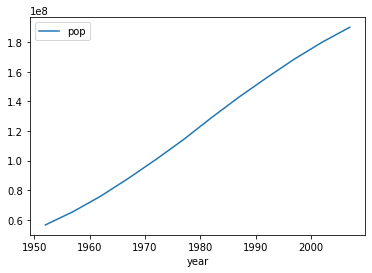

In [13]:
brasil.plot('year', 'pop') # gráfico simples 

<AxesSubplot:xlabel='year'>

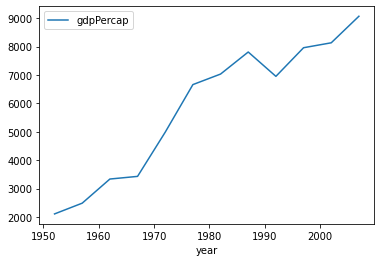

In [14]:
brasil.plot('year', 'gdpPercap')

In [15]:
dados.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


# Exportar os dados 

In [17]:
dados.to_csv('../resultados/exportacao.csv', index=False)

In [23]:
dados.to_excel('../resultados/exportacao.xlsx', index=False)

# Gráficos com a biblioteca Altair

In [26]:
import altair as alt 

In [27]:
todos = alt.Chart(dados.query('year == 2007 and country != "Brazil" ')).mark_point(filled=True, size=70).encode(
    x = alt.X('gdpPercap', title='GDP'),
    y = alt.Y('lifeExp', title='Life Expectancy'),
    color = 'continent',
    size = alt.Size('pop', scale=alt.Scale(range=[0, 2000])),
    tooltip=['country', 'continent', 'gdpPercap', 'lifeExp']
).properties(
    title = 'Africa ainda vive menos'
).interactive()

In [28]:
brasil = alt.Chart(dados.query('year == 2007 and country == "Brazil"')).mark_point(shape='diamond', filled=True, size=70,
                                                                                   color='black').encode(
    x = alt.X('gdpPercap', title='GDP'),
    y = alt.Y('lifeExp', title='Life Expectancy'),
    
    size = alt.Size('pop', scale=alt.Scale(range=[0, 2000])),
    tooltip=['country', 'continent', 'gdpPercap', 'lifeExp']
).properties(
    title = 'Africa ainda vive menos'
).interactive()

In [29]:
todos + brasil

alt.LayerChart(...)

In [30]:
todos

alt.Chart(...)